In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
df = pd.read_csv('data/microsoft_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


## Загальний графік зміни ціни на час відкриття біржі

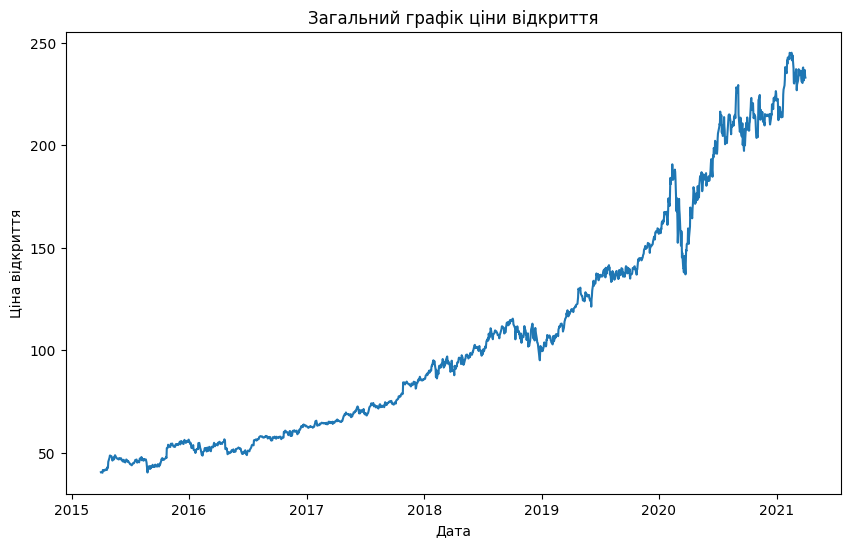

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df['Open'])
plt.title('Загальний графік ціни відкриття')
plt.xlabel('Дата')
plt.ylabel('Ціна відкриття')
plt.show()

## Графік зміни ціни на час відкриття біржі за 2020 год

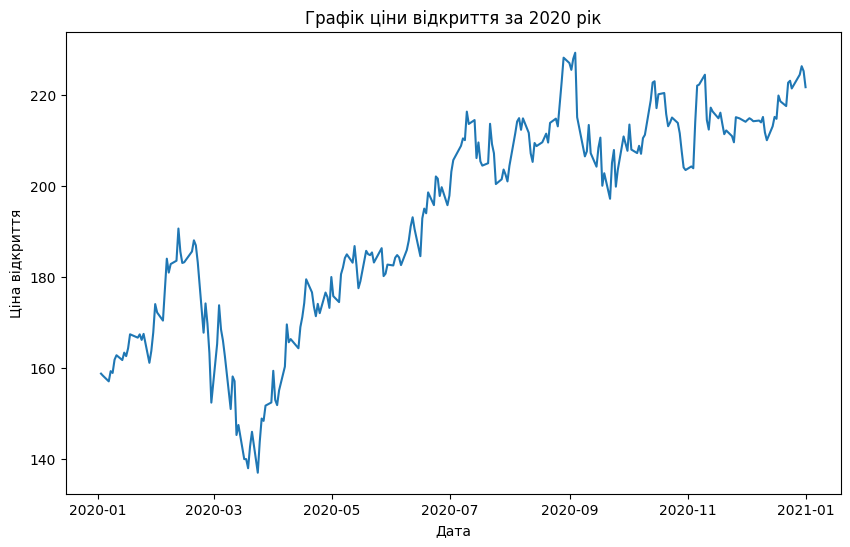

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df.loc['2020', 'Open'])
plt.title('Графік ціни відкриття за 2020 рік')
plt.xlabel('Дата')
plt.ylabel('Ціна відкриття')
plt.show()

## Графік зміни ціни на час відкриття біржі за лютий 2021 рік

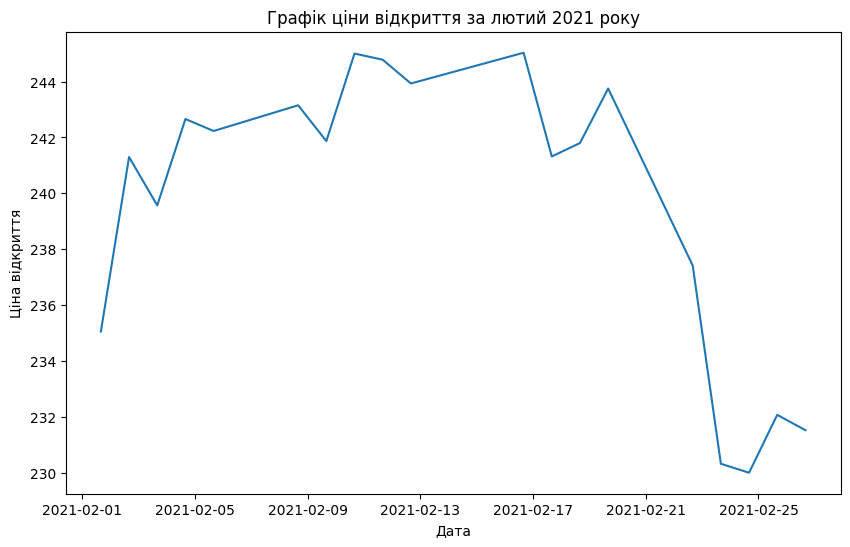

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df.loc['2021-02', 'Open'])
plt.title('Графік ціни відкриття за лютий 2021 року')
plt.xlabel('Дата')
plt.ylabel('Ціна відкриття')
plt.show()

## Графік зміни ціни на час відкриття біржі за травень 2017 – червень 2019

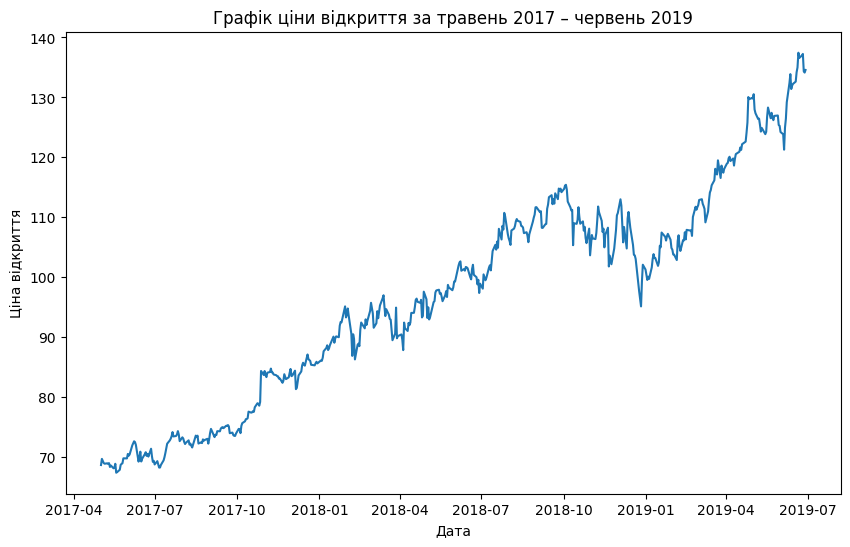

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df.loc['2017-05':'2019-06', 'Open'])
plt.title('Графік ціни відкриття за травень 2017 – червень 2019')
plt.xlabel('Дата')
plt.ylabel('Ціна відкриття')
plt.show()

## Графік зміни ціни на час відкриття біржі за 2019 та 2020 (паралельно)

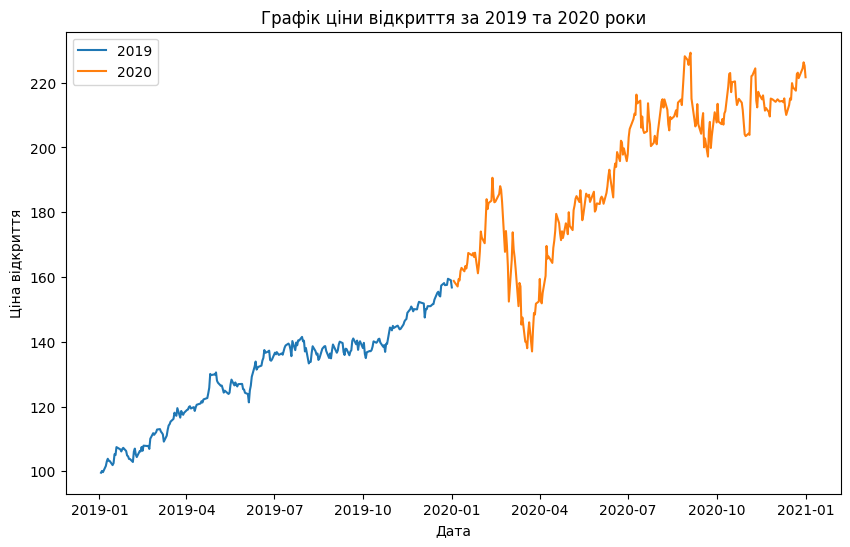

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df.loc['2019', 'Open'], label='2019')
plt.plot(df.loc['2020', 'Open'], label='2020')
plt.title('Графік ціни відкриття за 2019 та 2020 роки')
plt.xlabel('Дата')
plt.ylabel('Ціна відкриття')
plt.legend()
plt.show()

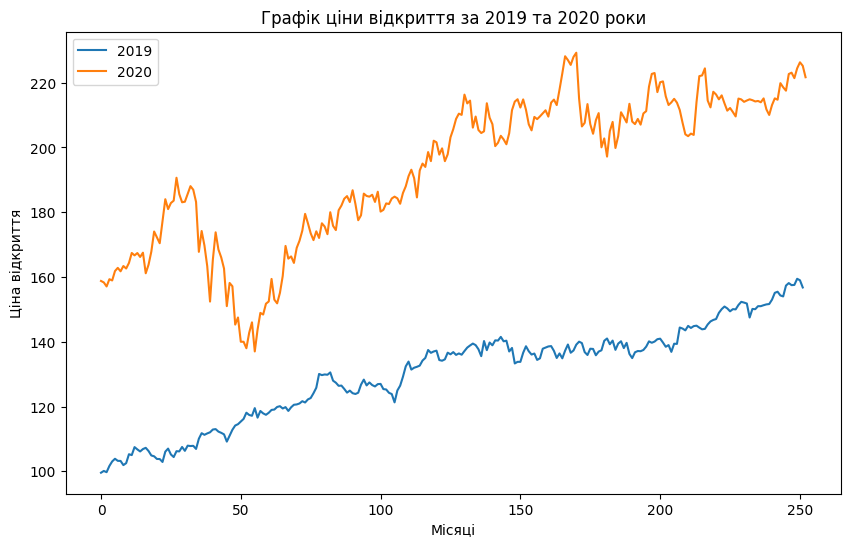

In [18]:
df_2019 = df.loc['2019', 'Open'].reset_index(drop=True)
df_2020 = df.loc['2020', 'Open'].reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.plot(df_2019, label='2019')
plt.plot(df_2020, label='2020')
plt.title('Графік ціни відкриття за 2019 та 2020 роки')
plt.xlabel('Місяці')
plt.ylabel('Ціна відкриття')
plt.legend()
plt.show()

## Середнє значення найменшої ціни за день за 2019 рік

In [19]:
mean_min_price_2019 = df.loc['2019', 'Low'].mean()
print(f"Середнє значення найменшої ціни за день за 2019 рік: {mean_min_price_2019}")

Середнє значення найменшої ціни за день за 2019 рік: 129.30285714285714


## Середнє значення найменшої ціни за день за кожний місяць

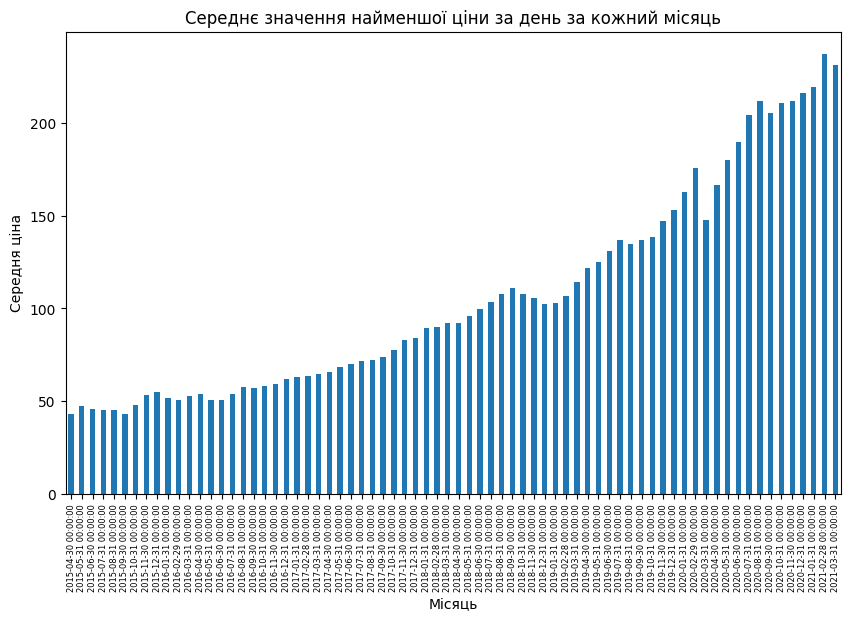

In [23]:
mean_min_price_monthly = df.resample('M')['Low'].mean()
plt.figure(figsize=(10,6))
mean_min_price_monthly.plot(kind='bar')
plt.title('Середнє значення найменшої ціни за день за кожний місяць')
plt.xlabel('Місяць')
plt.ylabel('Середня ціна')
plt.gca().tick_params(axis='x', labelsize=6)
plt.show()

In [28]:
print("Середнє значення найменшої ціни за день за кожний місяць:")
print(mean_min_price_monthly)

Середнє значення найменшої ціни за день за кожний місяць:
Date
2015-04-30     42.870952
2015-05-31     47.185500
2015-06-30     45.679545
2015-07-31     45.145455
2015-08-31     44.933810
                 ...    
2020-11-30    211.854000
2020-12-31    216.009091
2021-01-31    219.524211
2021-02-28    237.451579
2021-03-31    231.506087
Freq: M, Name: Low, Length: 72, dtype: float64


## Середнє значення найменшої ціни за день за кожні два тижні літа та осені 2020 року

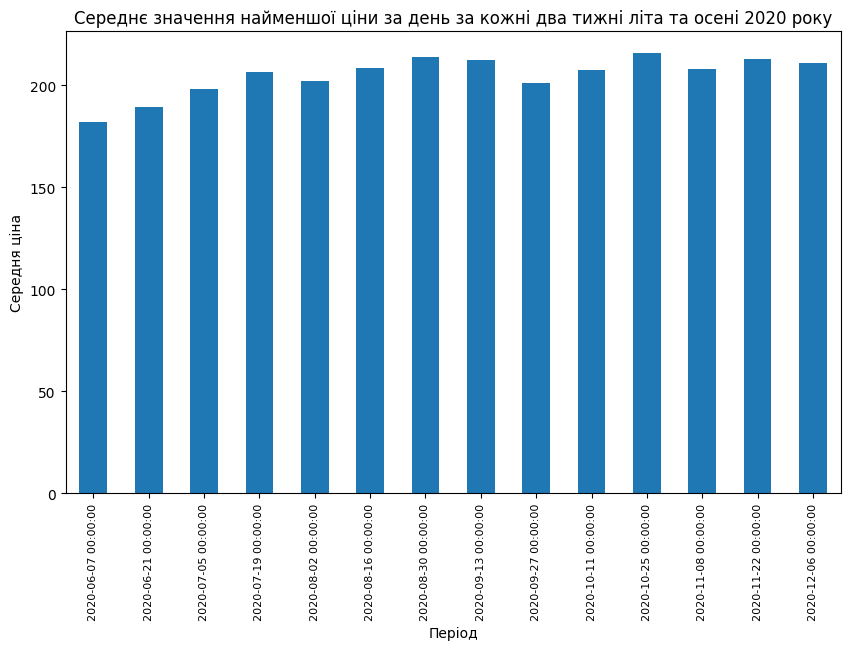

In [25]:
mean_min_price_biweekly_summer_autumn_2020 = df.loc['2020-06':'2020-11'].resample('2W')['Low'].mean()
plt.figure(figsize=(10,6))
mean_min_price_biweekly_summer_autumn_2020.plot(kind='bar')
plt.title('Середнє значення найменшої ціни за день за кожні два тижні літа та осені 2020 року')
plt.xlabel('Період')
plt.ylabel('Середня ціна')
plt.gca().tick_params(axis='x', labelsize=8)
plt.show()

In [29]:
print("Середнє значення найменшої ціни за день за кожні два тижні літа та осені 2020 року:")
print(mean_min_price_biweekly_summer_autumn_2020)

Середнє значення найменшої ціни за день за кожні два тижні літа та осені 2020 року:
Date
2020-06-07    182.140000
2020-06-21    189.149000
2020-07-05    197.958889
2020-07-19    206.458000
2020-08-02    202.228000
2020-08-16    208.470000
2020-08-30    213.801000
2020-09-13    212.276667
2020-09-27    201.204000
2020-10-11    207.634000
2020-10-25    215.649000
2020-11-08    207.836000
2020-11-22    212.788000
2020-12-06    210.872000
Freq: 2W-SUN, Name: Low, dtype: float64


## Зміни найменшої ціни за день у відсотках за кожен день впродовж осені 2018 року

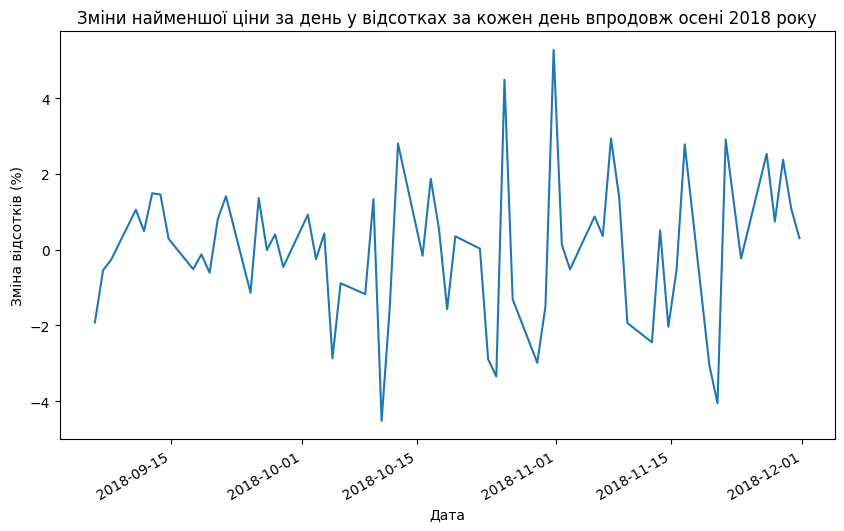

In [27]:
df_autumn_2018 = df.loc['2018-09':'2018-11'].copy()
df_autumn_2018['Low_pct_change'] = df_autumn_2018['Low'].pct_change() * 100
plt.figure(figsize=(10,6))
df_autumn_2018['Low_pct_change'].plot()
plt.title('Зміни найменшої ціни за день у відсотках за кожен день впродовж осені 2018 року')
plt.xlabel('Дата')
plt.ylabel('Зміна відсотків (%)')
plt.show()

## Ковзне середнє найменшої ціни за день за 2018 рік з вікном в місяць

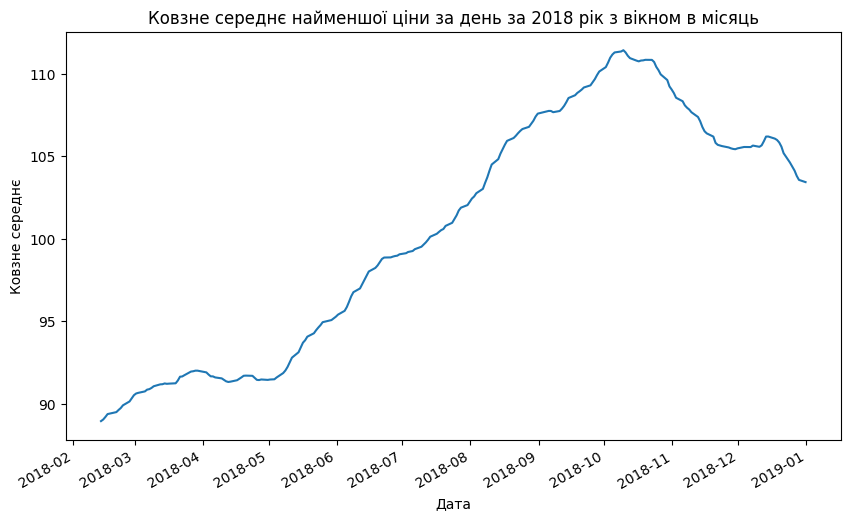

In [31]:
df_2018 = df.loc['2018'].copy()
df_2018['Low_rolling_mean'] = df_2018['Low'].rolling(window=30).mean()
plt.figure(figsize=(10,6))
df_2018['Low_rolling_mean'].plot()
plt.title('Ковзне середнє найменшої ціни за день за 2018 рік з вікном в місяць')
plt.xlabel('Дата')
plt.ylabel('Ковзне середнє')
plt.show()